<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Paul_selfstudy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
data.train_ds[0][0]

Text xxbos i ca n't say this is one of the best films i have ever seen . xxmaj but then again , i ca n't say it 's one of the worst i have ever seen . 
 
  xxup ok , so it 's basically a girl does skating , is good at it , wants to go to an expensive school , ca n't afford it and has to take a xxmaj xxunk xxmaj scholarship . xxmaj she has to hide her skating secret from her friends . 
 
  xxmaj personally , i did n't like the actress playing xxmaj katelin . xxmaj she absolutely could n't cry to save her life , just made wailing sounds , like a toddler pretending to cry to get it 's own way . 
 
  xxmaj katelin was just an annoying person . xxmaj the way she tried to act all nice and helpful to people . xxmaj also the part where the two xxunk are calling her names and they say something about her choreographer and she says she ' draws the line ' made me cringe . 
 
  xxmaj we all knew where it was going to go with her and xxmaj spencer . xxmaj classically they did n't like each other an

In [12]:
data.train_ds[0][0].data[:10]

array([  2,  18, 210,  36, 144,  20,  15,  43,  13,   8])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
bs = 48

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/unsup')]

In [16]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [19]:
data_lm.show_batch()

idx,text
0,potential flushed down the toilet . xxmaj the main plot is interesting and somewhat original . xxmaj it 's good enough to make a good adventurous movie out of would you think . xxmaj this movie however fails to entertain and i think that that is this movie biggest flaw . xxmaj perhaps it takes itself too serious and a little bit more humor certainly would n't had done the
1,"xxup asap ! xxbos xxmaj this movie made me think xxrep 4 . of how i could write something about it without personally dissing the director and all the actors , who , as an xxmaj australian , i am proud of for actually getting out there and making a film . \n \n xxmaj but the movie itself ? xxmaj let me tell you a story xxrep 4"
2,"it lacked basis to its plot , it 's that the great potential storyline was thrown away and poor acting added insult to injury . i 'll avoid the poor puns involving the title and just conclude with this : do n't watch this movie . xxbos i 'd have to say that i 've seen worse xxmaj sci xxmaj fi xxmaj channel originals , but this xxmaj nu xxmaj"
3,"one does n't really care about them , we just wonder when they will die ! xxmaj not to mention it has one too many cheesy moments and is padded with endless , unnecessary nature footage . xxmaj however it does have a few moments of interest to slasher fans , the occasional touch of spooky atmosphere , and a decent music score by xxmaj don xxmaj peake . xxmaj"
4,"think that because this took place in the 1940s that these boys could n't have had these sexual feelings for each other . xxmaj but i say they did -- at least in the book they did , and in this movie , xxmaj finney had them , almost painfully , for xxmaj gene . xxmaj the "" intensity "" that xxmaj john xxmaj knowles suggests existed between them was"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


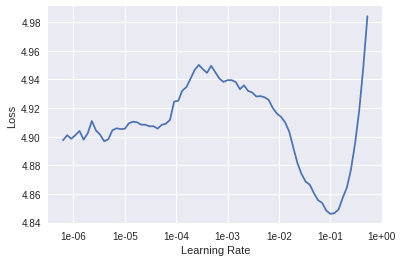

In [22]:
learn.recorder.plot(skip_end=15)

In [1]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

NameError: ignored